In [2]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [18]:
df=pd.read_csv("loan_data_v1.csv")
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,41282,31.0,female,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN
1,23717,29.0,female,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0
2,39085,27.0,male,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0
3,37196,27.0,female,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0
4,21819,29.0,female,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0


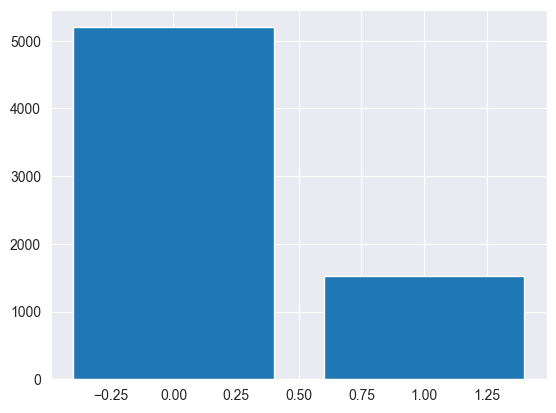

In [5]:
loan_status_count = df['loan_status'].value_counts()
plt.bar(loan_status_count.index, loan_status_count)
plt.show()

In [6]:
df['loan_status'].value_counts()

loan_status
0.0    5198
1.0    1528
Name: count, dtype: int64

In [7]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,41282,31.0,female,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN
1,23717,29.0,female,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0
2,39085,27.0,male,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0
3,37196,27.0,female,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0
4,21819,29.0,female,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0


In [8]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_gender                     268
person_education                  356
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         379
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
dtype: int64

In [19]:
gender_dummies = pd.get_dummies(df['person_gender'])
df.drop(columns=['person_gender'], inplace=True)
df = pd.concat([df, gender_dummies], axis=1)

In [10]:
df.head()


,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,High School,31903.0,10,OWN,13672.0,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN,True,False
1,23717,29.0,NaN,39365.0,3,RENT,9250.0,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0,True,False
2,39085,27.0,Bachelor,150854.0,6,MORTGAGE,15628.0,PERSONAL,9.18,0.10,4.0,633.0,No,0.0,False,True
3,37196,27.0,Bachelor,57474.0,6,RENT,5000.0,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0,True,False
4,21819,29.0,Associate,61039.0,7,MORTGAGE,10000.0,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0,True,False


In [20]:
categories=['High School', 'Bachelor', 'Associate', 'Master', 'Doctorate']
ordinal_encoder=OrdinalEncoder(categories=[categories],handle_unknown="use_encoded_value",unknown_value=np.nan)
df[['person_education']]=ordinal_encoder.fit_transform(df[['person_education']])

In [21]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_education                  356
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         379
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
female                              0
male                                0
dtype: int64

In [22]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_col = knn_imputer.fit_transform(df[["person_education", "loan_amnt"]])
df[["person_education", "loan_amnt"]] = np.round(imputed_col).astype(int)

In [23]:
df.head()

,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,0,31903.0,10,OWN,13672,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN,True,False
1,23717,29.0,1,39365.0,3,RENT,9250,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0,True,False
2,39085,27.0,1,150854.0,6,MORTGAGE,15628,PERSONAL,9.18,0.10,4.0,633.0,No,0.0,False,True
3,37196,27.0,1,57474.0,6,RENT,5000,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0,True,False
4,21819,29.0,2,61039.0,7,MORTGAGE,10000,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0,True,False


In [24]:
df.isna().sum()

Unnamed: 0                          0
person_age                        402
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
female                              0
male                                0
dtype: int64

In [25]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      342
previous_loan_defaults_on_file      0
loan_status                       274
female                              0
male                                0
dtype: int64

In [30]:
df['person_income'].dtype

dtype('float64')

In [31]:
df['person_age'].dtype


dtype('float64')

In [32]:
df['person_education'].dtype

dtype('int64')

In [34]:
#You should only use LabelEncoder to encode your target variable (y)—that is, the column you are trying to predict.

# For example, if you are predicting a target y that has values ['Cat', 'Dog', 'Cat'], LabelEncoder will correctly turn it into [0, 1, 0]. This is fine because it's the final answer, and the model isn't trying to find a mathematical relationship between the numbers.
#One hot is better here

label_encoder=LabelEncoder()
encoded_owners=label_encoder.fit_transform(df['person_home_ownership'])
df["person_home_ownership"] = encoded_owners.astype(int).flatten()

In [35]:
df.head()

,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,0,31903.0,10,2,13672,VENTURE,12.66,0.43,10.0,637.0,Yes,NaN,True,False
1,23717,29.0,1,39365.0,3,3,9250,HOMEIMPROVEMENT,15.65,0.23,7.0,625.0,No,1.0,True,False
2,39085,27.0,1,150854.0,6,0,15628,PERSONAL,9.18,0.10,4.0,633.0,No,0.0,False,True
3,37196,27.0,1,57474.0,6,3,5000,MEDICAL,10.36,0.09,7.0,NaN,Yes,0.0,True,False
4,21819,29.0,2,61039.0,7,0,10000,MEDICAL,7.88,0.16,8.0,673.0,Yes,0.0,True,False


In [36]:
df['loan_intent'].dtype


dtype('O')

In [38]:
label_encoder=LabelEncoder()
encoded_intent=label_encoder.fit_transform(df['loan_intent'])
df["loan_intent"] = encoded_intent.astype(int).flatten()

In [40]:
df['credit_score'].isna().sum()

np.int64(342)

In [41]:
median=df['credit_score'].median()

In [42]:
df['credit_score']=df['credit_score'].fillna(median)

In [43]:
df.head()

,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,0,31903.0,10,2,13672,5,12.66,0.43,10.0,637.0,Yes,NaN,True,False
1,23717,29.0,1,39365.0,3,3,9250,2,15.65,0.23,7.0,625.0,No,1.0,True,False
2,39085,27.0,1,150854.0,6,0,15628,4,9.18,0.10,4.0,633.0,No,0.0,False,True
3,37196,27.0,1,57474.0,6,3,5000,3,10.36,0.09,7.0,640.0,Yes,0.0,True,False
4,21819,29.0,2,61039.0,7,0,10000,3,7.88,0.16,8.0,673.0,Yes,0.0,True,False


In [44]:
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].apply(lambda x: 1 if x=='True' else 0)

In [45]:
df.head()

,Unnamed: 0,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,41282,31.0,0,31903.0,10,2,13672,5,12.66,0.43,10.0,637.0,0,NaN,True,False
1,23717,29.0,1,39365.0,3,3,9250,2,15.65,0.23,7.0,625.0,0,1.0,True,False
2,39085,27.0,1,150854.0,6,0,15628,4,9.18,0.10,4.0,633.0,0,0.0,False,True
3,37196,27.0,1,57474.0,6,3,5000,3,10.36,0.09,7.0,640.0,0,0.0,True,False
4,21819,29.0,2,61039.0,7,0,10000,3,7.88,0.16,8.0,673.0,0,0.0,True,False


In [46]:
df.isnull().sum()

Unnamed: 0                          0
person_age                        402
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                       274
female                              0
male                                0
dtype: int64

In [47]:
df.dropna(subset=['loan_status'],axis=0,inplace=True)

In [48]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [49]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
1,29.0,1,39365.0,3,3,9250,2,15.65,0.23,7.0,625.0,0,1.0,True,False
2,27.0,1,150854.0,6,0,15628,4,9.18,0.10,4.0,633.0,0,0.0,False,True
3,27.0,1,57474.0,6,3,5000,3,10.36,0.09,7.0,640.0,0,0.0,True,False
4,29.0,2,61039.0,7,0,10000,3,7.88,0.16,8.0,673.0,0,0.0,True,False
5,23.0,1,66611.0,0,3,11826,5,9.91,0.09,3.0,647.0,0,0.0,True,False


In [50]:
df.isnull().sum()

person_age                        378
person_education                    0
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
female                              0
male                                0
dtype: int64

In [51]:
df['person_age'].value_counts()

person_age
24.0    747
23.0    710
25.0    656
22.0    563
26.0    527
27.0    420
28.0    408
29.0    327
30.0    272
31.0    223
32.0    222
21.0    194
33.0    156
34.0    153
35.0    112
36.0    107
37.0     86
38.0     72
39.0     61
40.0     46
43.0     42
42.0     40
41.0     34
44.0     25
45.0     23
47.0     21
48.0     20
46.0     19
49.0      9
50.0      8
51.0      7
52.0      6
54.0      6
53.0      5
61.0      4
55.0      4
20.0      3
56.0      3
60.0      2
58.0      2
65.0      1
57.0      1
70.0      1
Name: count, dtype: int64

In [52]:
df = df.drop(columns=['person_age'])

In [53]:
df.isnull().sum()

person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
female                            0
male                              0
dtype: int64

In [54]:
X,y=df.drop(columns=['loan_status']),df['loan_status']

In [57]:
train_X,test_x,train_Y,test_y=train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)

In [58]:
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model.fit(train_X,train_Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
pred_y = model.predict(test_x)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
accuracy = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall = recall_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8841010401188707
Precision: 0.9009433962264151
Recall: 0.5858895705521472
F1-Score: 0.7100371747211895
